In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def linear_regression_analytical(X, y):
    # Добавляем столбец единичных значений для смещения (bias)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  
    
    # Вычисление коэффициентов по аналитической формуле
    # w = (X^T X)^-1 X^T y
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    return theta

# Пример данных
X = np.array([[1, 2], [2, 5], [3, 7], [4, 10]])  # Матрица признаков
y = np.array([5, 8, 10, 15])  # Целевая переменная

# Нахождение коэффициентов (включая смещение)
theta = linear_regression_analytical(X, y)

print("Коэффициенты модели (включая смещение):")
print(theta)

Коэффициенты модели (включая смещение):
[ 2.5 -2.   2. ]


In [4]:
class LinearRegression:
    def __init__(self, learning_rate, iterations):
        """
        Конструктор класса.
        
        Параметры:
        ----------
        learning_rate : float
            Скорость обучения.
        iterations : int
            Количество итераций.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.X = None
        self.Y = None
        self.n_samples = None
        self.n_features = None
    
    def fit(self, X, Y):
        """
        Обучение модели линейной регрессии с использованием градиентного спуска.
        
        Параметры:
        ----------
        X : numpy.ndarray
            Массив признаков.
        Y : numpy.ndarray
            Массив целевых значений.
        """
        self.X = X
        self.Y = Y
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
                
        # Инициализация весов и смещения
        self.weights = np.zeros(self.n_features)
        self.bias = 0
        
        # Градиентный спуск
        for i in range(self.iterations):
            self.update_weights()
        
        return self.weights, self.bias
    
    def update_weights(self):
        """
        Вспомогательный метод для обновления весов и смещения с использованием градиентного спуска.
        """
        # Предсказание
        Y_pred = np.dot(self.X, self.weights) + self.bias
        
        # Вычисление градиентов
        dw = (1 / self.n_samples) * np.dot(self.X.T, (Y_pred - self.Y))
        db = (1 / self.n_samples) * np.sum(Y_pred - self.Y)
        
        # Обновление весов и смещения
        self.weights -= self.learning_rate * dw
        self.bias -= self.learning_rate * db
    
    def predict(self, X):
        """
        Предсказание целевых значений для входных данных.
        
        Параметры:
        ----------
        X : numpy.ndarray
            Массив признаков.
            
        Возвращает:
        ----------
        numpy.ndarray
            Предсказанные значения.
        """
        return np.dot(X, self.weights) + self.bias

9876.11
22920.49


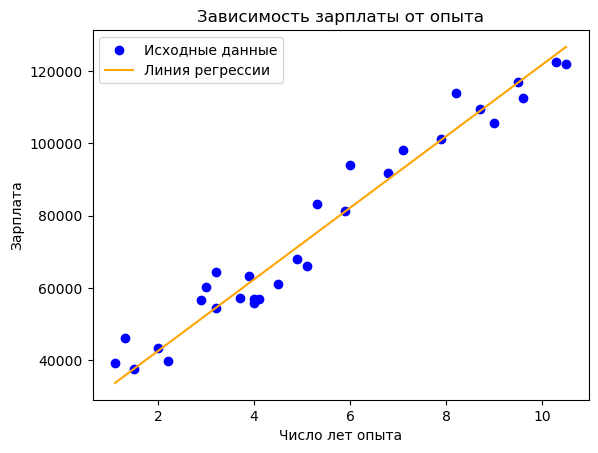

In [6]:
df = pd.read_csv( "data/salary_data.csv" )

X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

model = LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X, Y)

Y_pred = model.predict(X)

print(*np.round(model.weights, 2))
print(np.round(model.bias, 2))

plt.scatter(X, Y, color = 'blue', label='Исходные данные')
plt.plot(X, Y_pred, color = 'orange', label='Линия регрессии')
plt.title('Зависимость зарплаты от опыта')
plt.xlabel('Число лет опыта')
plt.ylabel('Зарплата')
plt.legend()

plt.show()